In [1]:
import requests

import pandas as pd

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
DF1=pd.read_csv('38100286.csv')

In [3]:
DF1.columns #Remove UOM, UOM_ID, SCALAR_FACTOR, SCALAR_ID, SYMBOL, TERMINATED, DECIMALS

Index(['REF_DATE', 'GEO', 'DGUID', 'Primary heating system and type of energy',
       'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE',
       'VALUE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

In [4]:
BadCol1=['UOM','UOM_ID','SCALAR_FACTOR','SCALAR_ID','SYMBOL','TERMINATED','DECIMALS']
BadCol1
DF1=DF1.drop(BadCol1, axis=1)
DF1=DF1.fillna(0)

In [5]:
DF1['GEO'].unique()

array(['Canada', 'Newfoundland and Labrador', 'Prince Edward Island',
       'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba',
       'Saskatchewan', 'Alberta', 'British Columbia',
       'Total census metropolitan areas',
       "St. John's, Newfoundland and Labrador", 'Halifax, Nova Scotia',
       'Moncton, New Brunswick', 'Saint John, New Brunswick',
       'Saguenay, Quebec', 'Québec, Quebec', 'Sherbrooke, Quebec',
       'Trois-Rivières, Quebec', 'Montréal, Quebec',
       'Ottawa-Gatineau, Ontario/Quebec', 'Ottawa-Gatineau (Quebec part)',
       'Ottawa-Gatineau (Ontario part)', 'Kingston, Ontario',
       'Peterborough, Ontario', 'Oshawa, Ontario', 'Toronto, Ontario',
       'Hamilton, Ontario', 'St. Catharines-Niagara, Ontario',
       'Kitchener-Cambridge-Waterloo, Ontario', 'Brantford, Ontario',
       'Guelph, Ontario', 'London, Ontario', 'Windsor, Ontario',
       'Barrie, Ontario', 'Greater Sudbury, Ontario',
       'Thunder Bay, Ontario', 'Winnipeg, Manito

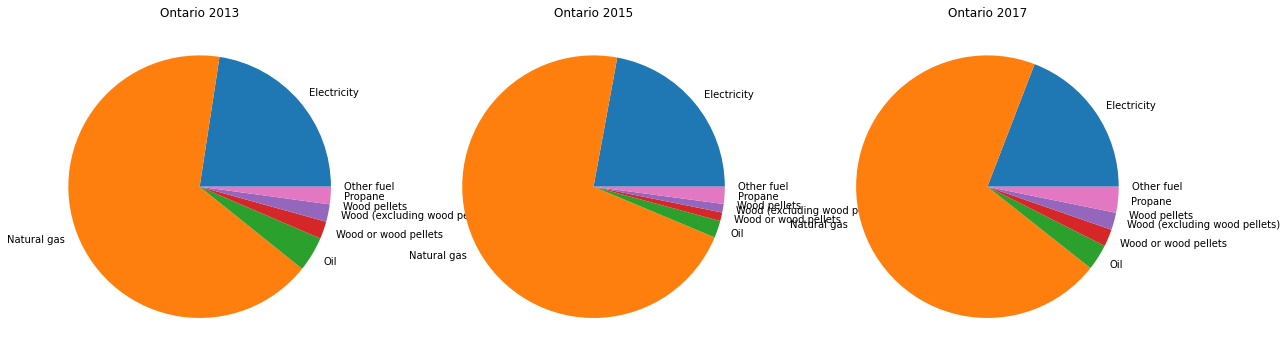

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(20,10))
GEO='Ontario'

sizes1=DF1[(DF1['GEO']==GEO)&(DF1['REF_DATE']==2013)]['VALUE'][1:9]
labels1=DF1[(DF1['GEO']==GEO)&(DF1['REF_DATE']==2013)]['Primary heating system and type of energy'][1:9]

sizes2=DF1[(DF1['GEO']==GEO)&(DF1['REF_DATE']==2015)]['VALUE'][1:9]
labels2=DF1[(DF1['GEO']==GEO)&(DF1['REF_DATE']==2015)]['Primary heating system and type of energy'][1:9]

sizes3=DF1[(DF1['GEO']==GEO)&(DF1['REF_DATE']==2017)]['VALUE'][1:9]
labels3=DF1[(DF1['GEO']==GEO)&(DF1['REF_DATE']==2017)]['Primary heating system and type of energy'][1:9]

ax[0].pie(sizes1,labels=labels1);
ax[0].set_title(f"{GEO} 2013");
ax[1].pie(sizes2,labels=labels2);
ax[1].set_title(f"{GEO} 2015");
ax[2].pie(sizes3,labels=labels3);
ax[2].set_title(f"{GEO} 2017");



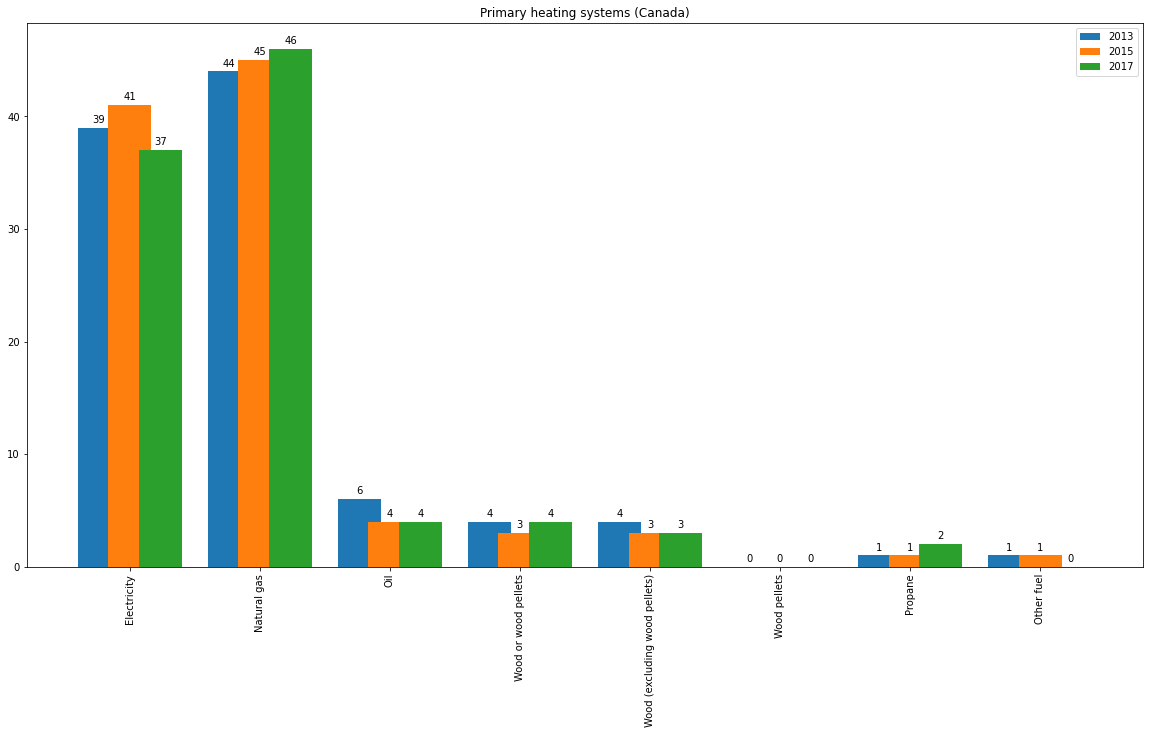

In [7]:
fig, ax = plt.subplots(figsize=(20,10))
GEO='Canada'
labels=DF1[(DF1['GEO']==GEO)&(DF1['REF_DATE']==2013)]['Primary heating system and type of energy'][1:9]
sizes1=DF1[(DF1['GEO']==GEO)&(DF1['REF_DATE']==2013)]['VALUE'][1:9].astype(int)
sizes2=DF1[(DF1['GEO']==GEO)&(DF1['REF_DATE']==2015)]['VALUE'][1:9].astype(int)
sizes3=DF1[(DF1['GEO']==GEO)&(DF1['REF_DATE']==2017)]['VALUE'][1:9].astype(int)

x = np.arange(len(labels))
width = 0.33  # the width of the bars

bar1=ax.bar(x-width/1.4,sizes1,width,label='2013');
bar2=ax.bar(x,sizes2,width,label='2015');
bar3=ax.bar(x+width/1.4,sizes3,width,label='2017');
ax.set_title(f"Primary heating systems ({GEO})")
ax.set_xticks(x);
ax.set_xticklabels(labels,rotation='vertical');
ax.legend();

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

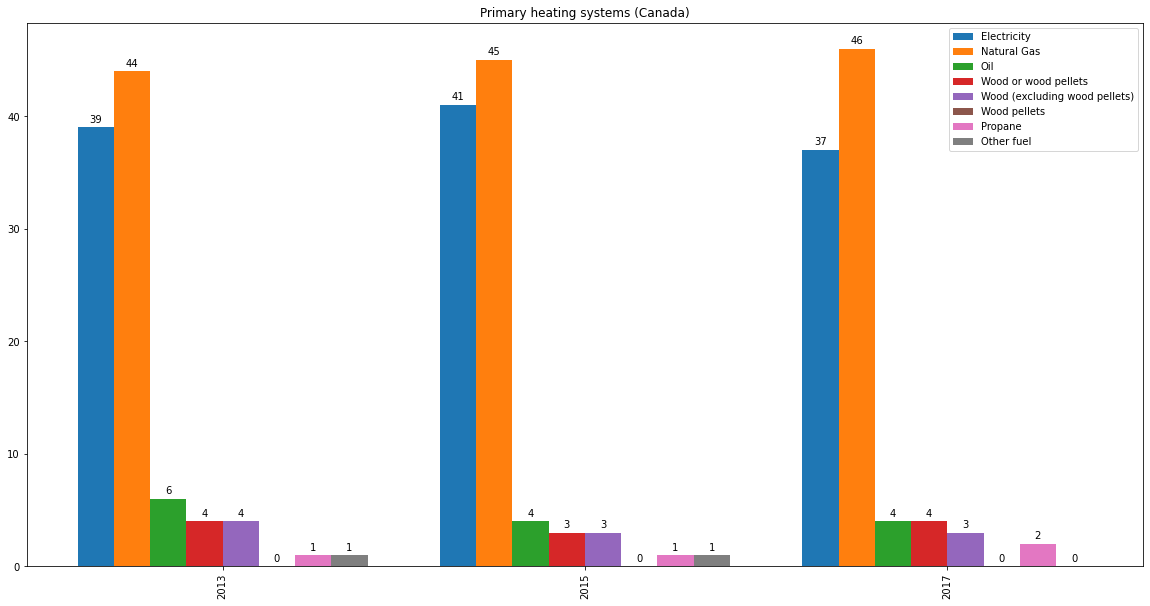

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
GEO='Canada'
labels=('2013','2015','2017')

sizes1=DF1[(DF1['VECTOR']==DF1[(DF1['GEO']==GEO)&(DF1['Primary heating system and type of energy']=='Electricity')]['VECTOR'].iloc[0])&(DF1['GEO']==GEO)]['VALUE'].astype(int)
sizes2=DF1[(DF1['VECTOR']==DF1[(DF1['GEO']==GEO)&(DF1['Primary heating system and type of energy']=='Natural gas')]['VECTOR'].iloc[0])&(DF1['GEO']==GEO)]['VALUE'].astype(int)
sizes3=DF1[(DF1['VECTOR']==DF1[(DF1['GEO']==GEO)&(DF1['Primary heating system and type of energy']=='Oil')]['VECTOR'].iloc[0])&(DF1['GEO']==GEO)]['VALUE'].astype(int)
sizes4=DF1[(DF1['VECTOR']==DF1[(DF1['GEO']==GEO)&(DF1['Primary heating system and type of energy']=='Wood or wood pellets')]['VECTOR'].iloc[0])&(DF1['GEO']==GEO)]['VALUE'].astype(int)
sizes5=DF1[(DF1['VECTOR']==DF1[(DF1['GEO']==GEO)&(DF1['Primary heating system and type of energy']=='Wood (excluding wood pellets)')]['VECTOR'].iloc[0])&(DF1['GEO']==GEO)]['VALUE'].astype(int)
sizes6=DF1[(DF1['VECTOR']==DF1[(DF1['GEO']==GEO)&(DF1['Primary heating system and type of energy']=='Wood pellets')]['VECTOR'].iloc[0])&(DF1['GEO']==GEO)]['VALUE'].astype(int)
sizes7=DF1[(DF1['VECTOR']==DF1[(DF1['GEO']==GEO)&(DF1['Primary heating system and type of energy']=='Propane')]['VECTOR'].iloc[0])&(DF1['GEO']==GEO)]['VALUE'].astype(int)
sizes8=DF1[(DF1['VECTOR']==DF1[(DF1['GEO']==GEO)&(DF1['Primary heating system and type of energy']=='Other fuel')]['VECTOR'].iloc[0])&(DF1['GEO']==GEO)]['VALUE'].astype(int)

x = np.arange(len(labels))
width = 0.1  # the width of the bars

bar1=ax.bar(x-0.35,sizes1,width,label='Electricity');
bar2=ax.bar(x-0.25,sizes2,width,label='Natural Gas');
bar3=ax.bar(x-0.15,sizes3,width,label='Oil');
bar4=ax.bar(x-0.05,sizes4,width,label='Wood or wood pellets');
bar5=ax.bar(x+0.05,sizes5,width,label='Wood (excluding wood pellets)');
bar6=ax.bar(x+0.15,sizes6,width,label='Wood pellets');
bar7=ax.bar(x+0.25,sizes7,width,label='Propane');
bar8=ax.bar(x+0.35,sizes8,width,label='Other fuel');

ax.set_title(f"Primary heating systems ({GEO})")
ax.set_xticks(x);
ax.set_xticklabels(labels,rotation='vertical');
ax.legend();

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
autolabel(bar4)
autolabel(bar5)
autolabel(bar6)
autolabel(bar7)
autolabel(bar8)